# Лабораторная работа №4: Частотный анализ формул численного интегрирования

Выполнили студенты гр. 2381 Ваньков Ярослав Сергеевич и Вакуленко Инна Юрьевна. Бригада №4.


## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования.


## Основные теоретические положения

### Формула прямоугольников

$$y_{n+1} = y_n + s_{n+\frac{1}{2}}, \quad y_0 = 0$$

### Формула трапеций

$$y_{n+1} = y_n + \frac{1}{2}(s_n + s_{n+1}), \quad y_0 = 0$$

### Формула Симпсона

$$y_{n+1} = y_n + \frac{1}{3}(s_{n-1} + 4s_n + s_{n+1}), \quad y_0 = 0$$

### Формула интегрирования "по правилу 3/8"

$$y_{n+2} = y_{n-1} + \frac{1}{8}(s_{n-1} + 3s_n + 3s_{n+1} + s_{n+2}), \quad y_0 = 0$$

### Связь передаточной функции для круговой и циклической частоты

$$H(\omega) = H(2\pi f) = \tilde{H}(f)$$



## Постановка задачи

Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Построить графики $\tilde{H}(f)$ и графики отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ.



## Выполнение работы



In [1]:
# Импорт библиотек
import math
import cmath
import matplotlib.pyplot as plt

# Настройка графиков
plt.rcParams['figure.figsize'] = (12, 5)



### Передаточная функция для формулы прямоугольников

Пусть $s_n = e^{i\omega n}$, $y_n = H(\omega)e^{i\omega n}$

$$H(\omega)e^{i\omega(n+1)} = H(\omega)e^{i\omega n} + e^{i\omega(n+0.5)}$$

$$H(\omega)(e^{i\omega n}e^{i\omega} - e^{i\omega n}) = e^{i\omega n}e^{0.5i\omega}$$

$$H(\omega)(e^{i\omega} - 1) = e^{0.5i\omega}$$

$$H(\omega) = \frac{e^{0.5i\omega}}{e^{i\omega} - 1} = \frac{1}{e^{0.5i\omega} - e^{-0.5i\omega}} = \frac{1}{2i\sin(\omega/2)}$$

Точное значение интеграла $e^{i\omega t}$ равно $\frac{e^{i\omega t}}{i\omega}$



### Передаточная функция для формулы трапеций

Пусть $s_n = e^{i\omega n}$, $y_n = H(\omega)e^{i\omega n}$

$$H(\omega)e^{i\omega(n+1)} = H(\omega)e^{i\omega n} + \frac{1}{2}(e^{i\omega n} + e^{i\omega(n+1)})$$

$$H(\omega)(e^{i\omega} - 1) = \frac{1}{2}(1 + e^{i\omega})$$

$$H(\omega) = \frac{1 + e^{i\omega}}{2(e^{i\omega} - 1)}$$



### Передаточная функция для формулы Симпсона

Пусть $s_n = e^{i\omega n}$, $y_n = H(\omega)e^{i\omega n}$

$$H(\omega)e^{i\omega(n+1)} = H(\omega)e^{i\omega n} + \frac{1}{3}(e^{i\omega(n-1)} + 4e^{i\omega n} + e^{i\omega(n+1)})$$

$$H(\omega)(e^{i\omega} - 1) = \frac{1}{3}(e^{-i\omega} + 4 + e^{i\omega})$$

$$H(\omega) = \frac{e^{i\omega} + 4 + e^{-i\omega}}{3(e^{i\omega} - e^{-i\omega})}$$



In [2]:
# Передаточные функции

# Формула прямоугольников
def H_rectangle(w):
    return cmath.exp(0.5j*w) / (cmath.exp(1j*w) - 1)

# Формула трапеций
def H_trapezoid(w):
    return (cmath.exp(1j*w) + 1) / (2 * (cmath.exp(1j*w) - 1))

# Формула Симпсона
def H_simpson(w):
    return (cmath.exp(1j*w) + 4 + cmath.exp(-1j*w)) / (3 * (cmath.exp(1j*w) - cmath.exp(-1j*w)))

# Отношение вычисляемого значения к истинному (gamma)

# Формула прямоугольников
def Y_rectangle(w):
    return (w / 2) / math.sin(w / 2)

# Формула трапеций
def Y_trapezoid(w):
    return math.cos(w/2) * ((w / 2) / math.sin(w/2))

# Формула Симпсона
def Y_simpson(w):
    return ((2 + math.cos(w)) / 3) * (w / math.sin(w))



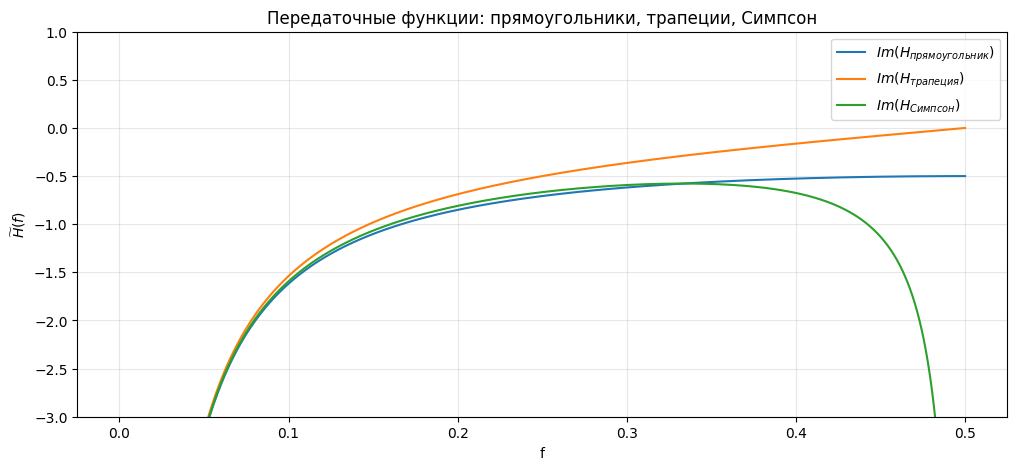

In [3]:
# Количество частот гармоник
N = 8192
# Циклические частоты (исключаем 0 для избежания деления на ноль)
F = [f/N for f in range(1, N)][:N//2 - 1]
# Круговые частоты
W = [2*math.pi * f for f in F]

# Вычисляем значения передаточных функций
h_r = [H_rectangle(w) for w in W]
h_t = [H_trapezoid(w) for w in W]
h_s = [H_simpson(w) for w in W]

# Вычисляем отношения
y_r = [Y_rectangle(w) for w in W]
y_t = [Y_trapezoid(w) for w in W]
y_s = [Y_simpson(w) for w in W]

# График передаточных функций (мнимая часть)
plt.plot(F, [x.imag for x in h_r], label='$Im(H_{прямоугольник})$')
plt.plot(F, [x.imag for x in h_t], label='$Im(H_{трапеция})$')
plt.plot(F, [x.imag for x in h_s], label='$Im(H_{Симпсон})$')
plt.xlabel('f')
plt.ylabel('$\\widetilde{H}(f)$')
plt.title('Передаточные функции: прямоугольники, трапеции, Симпсон')
plt.legend()
plt.ylim((-3, 1))
plt.grid(True, alpha=0.3)
plt.show()



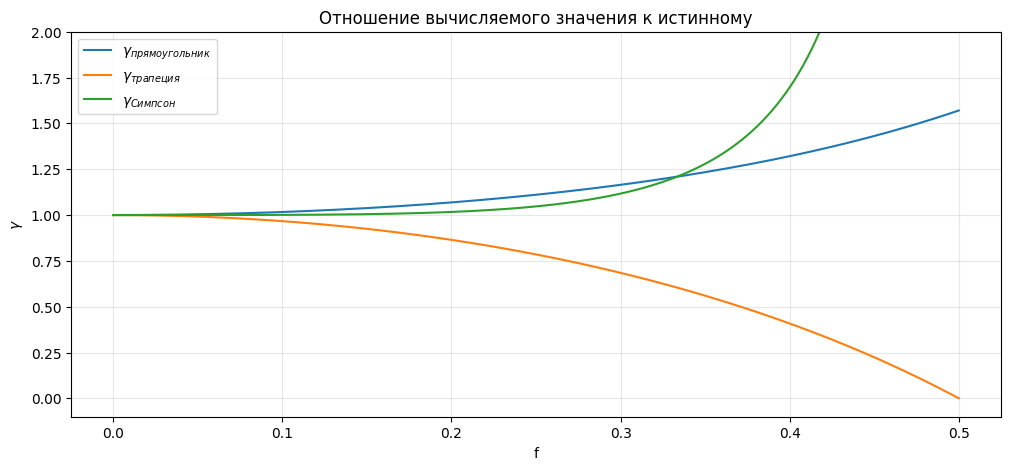

In [4]:
# График отношений вычисляемых значений к истинным
plt.plot(F, y_r, label=r'$\gamma_{прямоугольник}$')
plt.plot(F, y_t, label=r'$\gamma_{трапеция}$')
plt.plot(F, y_s, label=r'$\gamma_{Симпсон}$')
plt.xlabel('f')
plt.ylabel(r'$\gamma$')
plt.title('Отношение вычисляемого значения к истинному')
plt.legend()
plt.ylim((-0.1, 2))
plt.grid(True, alpha=0.3)
plt.show()



**Интерпретация:**

Графики передаточных функций демонстрируют, что для низких частот все три фильтра действуют схожим образом, вызывая отрицательное усиление, которое неограниченно растет при приближении частоты к нулю (f→0). Однако на высоких частотах их характеристики различаются: 

- **Метод трапеций** эффективно подавляет высокочастотные составляющие
- **Метод прямоугольников** приводит к небольшому отрицательному усилению/подавлению
- **Метод Симпсона** имеет асимптоты как при f→0, так и при f→0.5 (частота Найквиста), где передаточная функция H(ω) уходит в минус бесконечность, а относительная точность γ — в плюс бесконечность



### Передаточная функция для интегрирования "по правилу 3/8"

Пусть $s_n = e^{i\omega n}$, $y_n = H(\omega)e^{i\omega n}$

$$H(\omega)e^{i\omega(n+2)} = H(\omega)e^{i\omega(n-1)} + \frac{1}{8}(e^{i\omega(n-1)} + 3e^{i\omega n} + 3e^{i\omega(n+1)} + e^{i\omega(n+2)})$$

$$H(\omega)(e^{2i\omega} - e^{-i\omega}) = \frac{1}{8}(e^{-i\omega} + 3 + 3e^{i\omega} + e^{2i\omega})$$

$$H(\omega) = \frac{e^{2i\omega} + 3e^{i\omega} + 3 + e^{-i\omega}}{8(e^{2i\omega} - e^{-i\omega})}$$



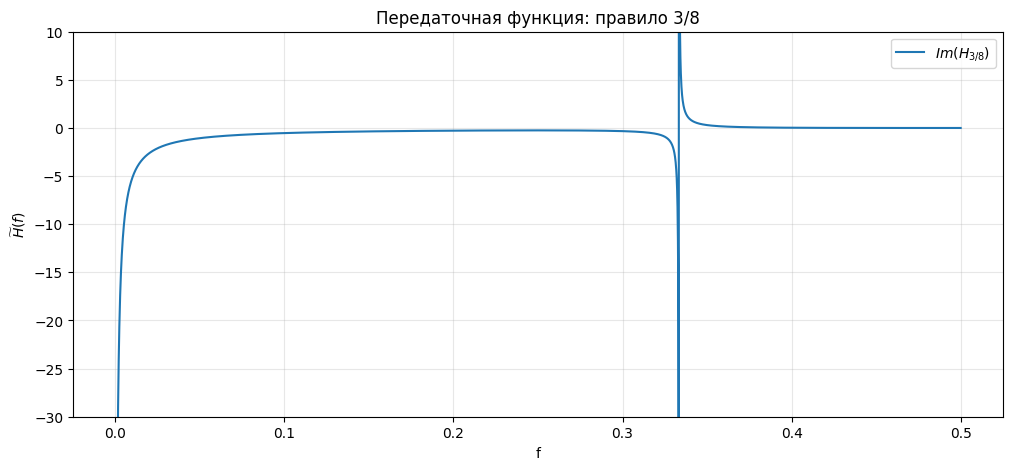

In [5]:
# Формула 3/8
def H_3_8(w):
    return (cmath.exp(2j*w) + 3*cmath.exp(1j*w) + 3 + cmath.exp(-1j*w)) / (8 * (cmath.exp(2j*w) - cmath.exp(-1j*w)))

def Y_3_8(w):
    return (2 * math.cos(3*w/2) + 6 * math.cos(w/2)) * w / (16 * math.sin(3*w/2))

# Вычисляем значения
h_3_8 = [H_3_8(w) for w in W]
y_3_8 = [Y_3_8(w) for w in W]

# График передаточной функции
plt.plot(F, [x.imag for x in h_3_8], label='$Im(H_{3/8})$')
plt.xlabel('f')
plt.ylabel('$\\widetilde{H}(f)$')
plt.title('Передаточная функция: правило 3/8')
plt.legend()
plt.ylim((-30, 10))
plt.grid(True, alpha=0.3)
plt.show()



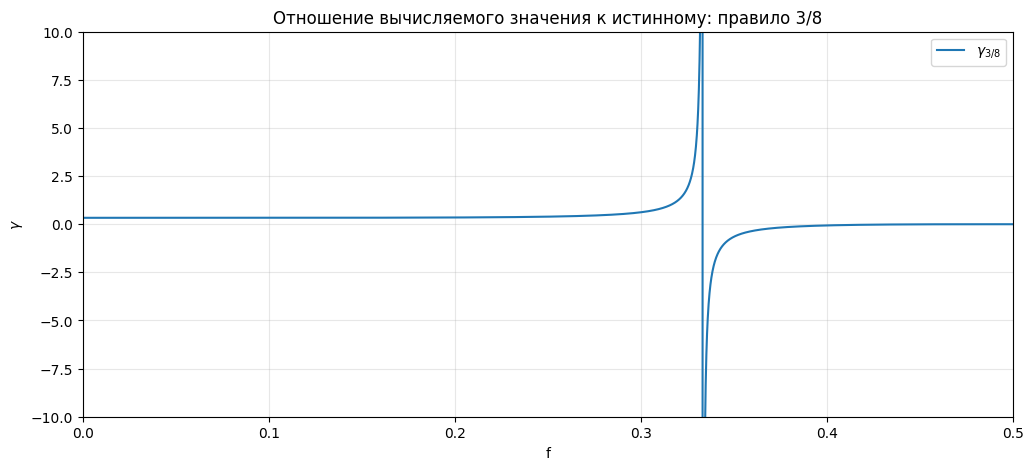

In [6]:
# График отношения для правила 3/8
plt.plot(F, y_3_8, label=r'$\gamma_{3/8}$')
plt.xlabel('f')
plt.ylabel(r'$\gamma$')
plt.title('Отношение вычисляемого значения к истинному: правило 3/8')
plt.legend()
plt.ylim((-10, 10))
plt.xlim((0, 0.5))
plt.grid(True, alpha=0.3)
plt.show()



**Интерпретация:**

Частотная характеристика рекурсивного фильтра по правилу 3/8 отличается наличием асимптот не только при f=0, но и в точке f≈1/3. Это вызывает сильное искажение сигнала вблизи этих частот. Неподалеку от асимптот наблюдается усиление (как положительное, так и отрицательное), тогда как в основном частотном диапазоне фильтр ослабляет сигнал.



### Сопоставительный анализ частотных характеристик передаточных функций

Анализ представленных графиков передаточных функций показывает, что все рассматриваемые фильтры сильно искажают сигнал вблизи нулевой частоты из-за наличия там асимптоты. По мере приближения к частоте f = 0.5 (высокие частоты) их характеристики расходятся:

- **Фильтр Симпсона** снова демонстрирует асимптоту и искажает сигнал
- **Фильтр трапеций** полностью подавляет высокочастотные составляющие
- **Фильтр прямоугольников** дает небольшое отрицательное подавление
- **Фильтр по правилу 3/8** имеет передаточную функцию, стремящуюся к нулю, что также означает подавление сигнала

Характерной чертой фильтра по правилу 3/8 является наличие еще одной асимптоты вблизи f ≈ 0.333, которая также вносит сильные искажения.



## Выводы

В ходе выполнения этой практической работы был проведён анализ частотных характеристик известных формул численного интегрирования.

Для этого были выведены формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций, Симпсона и правилу 3/8. Затем были построены графики этих передаточных функций и графики отношения вычисляемого значения к истинному, а также проинтерпретированы частотные свойства полученных фильтров.

**Основные результаты:**

1. Все исследованные фильтры имеют асимптоту при f→0, что приводит к сильным искажениям на низких частотах
2. Фильтр Симпсона имеет дополнительную асимптоту при f=0.5 (частота Найквиста)
3. Фильтр по правилу 3/8 имеет дополнительную асимптоту при f≈0.333
4. Фильтр трапеций показывает наилучшее подавление высоких частот
5. Относительная точность (γ) всех методов ухудшается вблизи асимптот

Наконец, был проведён сопоставительный анализ частотных характеристик всех рассмотренных методов интегрирования.

**Цель работы достигнута:** проведен частотный анализ формул численного интегрирования.

